## **Chapter 3 – Foundations of AI and Tools for Chemists**

This chapter lays the groundwork for applying artificial intelligence to chemistry.  
We begin with core machine-learning concepts—building intuition for methods like neural networks and transformers. Next, we set up a Python environment and introduce essential libraries, with special focus on **RDKit** for chemoinformatics. Finally, we work through hands-on examples of molecular handling: cleaning structures, enumerating reactions, and visualizing molecules in 2D and 3D.  

By the end of this chapter, you will:  
- Understand the basics of machine learning in a chemical context  
- Know how to set up and use Python with key libraries for chemical data  
- Have practical experience applying these tools to real molecular problems  

This chapter is designed as a **practical, tutorial-style guide**, preparing you for more advanced applications of LLMs in later chapters.


### 3.2.1 Setting Up a Python Environment  

To begin working with AI tools in chemistry, we’ll set up a dedicated Python environment using **Conda** (via Anaconda or Miniconda). Conda makes it easy to install scientific libraries and manage dependencies such as those required by RDKit.  

**Step 1. Install Anaconda or Miniconda**  
Download and install [Anaconda](https://www.anaconda.com/download) (full distribution) or [Miniconda](https://docs.conda.io/en/latest/miniconda.html) (lighter version). Both provide Python and Conda; Anaconda also includes Jupyter Notebook.  

**Step 2. Create a new environment with Python 3.10**  

```bash
conda create -n chem-ai python=3.10
```
This creates a new environment named chem-ai with Python 3.10.

**Step 3. Activate the environment**  

```bash
conda create -n chem-ai python=3.10
```
From now on, all package installs will go into this environment.

**Step 4. Install essential packages**  

```bash
conda install -c conda-forge rdkit numpy pandas scikit-learn matplotlib
```
This installs:

- **RDKit** – chemoinformatics toolkit  
- **NumPy** – numerical computing  
- **pandas** – data handling  
- **scikit-learn** – ML algorithms  
- **matplotlib** – plotting and visualization  

**Step 5. Launch Jupyter Notebook (recommended)**  

```bash
jupyter notebook
```
This opens an interactive web interface where you can write and run Python code, visualize molecules, and document workflows.


**Step 6. Test your environment (optional)**  

```python
import numpy as np
print("Numpy version:", np.__version__)
```


After setup, you’ll have a robust local environment ready.  
- For quick experiments, you can use **cloud options** like Google Colab (free, Jupyter-like, with RDKit pre-installed) or Binder notebooks.  
- For **serious projects or sensitive data**, a **local setup** is recommended.  


In [ ]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 2.0.2



Python uses **indentation** (not braces or END statements) to define code blocks, making the syntax clean and uniform. In Jupyter Notebook, code is typed into a cell and run with **Shift+Enter**, showing output just below.  

As a simple example, we can calculate the molecular weight of ethanol (C₂H₆O):  

- A **dictionary** stores atomic weights for H, C, and O  
- **Square brackets** access values by key  
- The **print** function displays results  
  

In [ ]:
atom = {"H": 1.008, "C": 12.01, "O": 16.00}
mw = 2*atom["C"] + 6*atom["H"] + 1*atom["O"]
print("Molecular weight of C2H6O:", mw)

Molecular weight of C2H6O: 46.068



This trivial example already shows how chemists can do useful tasks like calculating formula weights, converting units, or applying simple rules. The real power of Python comes with its **libraries**: while manual calculations work for one molecule, automating across hundreds requires tools that can parse formulas and provide atomic weights. That’s where Python’s ecosystem (e.g., RDKit) becomes indispensable.  


### 3.2.3 Introduction to RDKit  

No discussion of chemoinformatics in Python is complete without **RDKit**.  
RDKit is an open-source toolkit that provides a wide range of functionality for working with chemical structures and data, and it is widely considered a must-have tool for chemists who program.  

In this section, we will:  
- Cover how to install and set up RDKit  
- Introduce its core concepts and usage  
- Demonstrate basic tasks such as reading a molecule from a SMILES string, examining its properties, and manipulating it  

If you followed the environment setup earlier, you may already have RDKit installed.  
The most straightforward way to install it is via **conda** using the **conda-forge** channel:  

```bash
conda install -c conda-forge rdkit
```

This will pull the precompiled RDKit package for your platform and install it in your environment.


After installation, test it as mentioned earlier:

In [ ]:
from rdkit  import Chem
mol = Chem.MolFromSmiles('CCO') # a simple molecule, ethanol print(mol)
print(mol)

If RDKit is installed correctly, `Chem.MolFromSmiles` will return a molecule object (`<rdkit.Chem.rdchem.Mol object>`).  
If something went wrong, it may return `None` or raise an error.  

Here’s another quick test:


In [ ]:
print(Chem.MolToSmiles(mol))

CCO


In RDKit, the fundamental object is the Mol – an object representing a molecule. Typically, you obtain a Mol by reading in some representation, such as a SMILES string or a Mol file. For example:

In [ ]:
from rdkit import Chem
mol = Chem.MolFromSmiles("CCO")

This creates an RDKit molecule for ethanol (CCO). You can also read from a MOL file or SDF:

In [ ]:
mol2 = Chem.MolFromMolFile("molecule.mol")

RDKit supports many input formats (SMILES, SDF, MolBlock, InChI, etc.). If reading multiple molecules from a file (like an SDF with many entries), there are “supplier” objects (e.g., Chem.SDMolSupplier which you can loop over). But for simplicity, let’s stick to single molecules for now. What is inside a Mol object? Conceptually, RDKit represents a molecule as a graph: atoms connected by bonds. Each Atom has properties (like atomic number, formal charge, etc.), and each Bond has a type (single, double, aromatic, etc.), possibly stereochemistry, etc. RDKit’s Mol holds all this, and provides methods to access it. For example, you can iterate over atoms or bonds

In [ ]:
for atom in mol.GetAtoms(): print(atom.GetSymbol(), atom.GetAtomicNum())

C 6
C 6
O 8


### Exploring Atoms and Bonds  

This example prints each atom’s symbol and atomic number in a molecule.  
Similarly, `mol.GetBonds()` lets you loop through bonds.  

Each **Atom** or **Bond** object has a rich set of methods, for example:  



In [ ]:
methane = Chem.MolFromSmiles("C")
num_atoms = methane.GetNumAtoms()
print("Number of atoms in methane:", num_atoms)

Number of atoms in methane: 1


But methane (CH₄) has 5 atoms (1 carbon + 4 hydrogens)!  

RDKit by default considers only **heavy atoms** (non-hydrogens) when a molecule is created from SMILES.  
In the SMILES `"C"` for methane, the hydrogen atoms are implicit. RDKit knows they are there (carbon has valence 4, so it assumes 4 hydrogens), but it doesn’t explicitly list them in the graph unless asked.  

This is a **design choice**: chemists often don’t want to deal with all hydrogens unless necessary, for simplicity and performance.  

If you want to include hydrogens explicitly, you can add them.  

In [ ]:
methane_with_H = Chem.AddHs(methane)
print("Number of atoms in methane with H:", methane_with_H.GetNumAtoms())

Number of atoms in methane with H: 5


Now the molecule graph has 1 carbon and 4 hydrogens.  
RDKit’s `AddHs` function makes implicit hydrogens explicit, and the corresponding `RemoveHs` function can drop them again.  

Most computations (e.g., fingerprints, descriptors) assume **implicit hydrogens**, so you usually don’t need to add them unless working with 3D geometry or specific chemistry (such as stereochemistry involving hydrogens).  

To illustrate accessing atomic information, consider ethanol `"CCO"`.  

In [ ]:
ethanol = Chem.MolFromSmiles("CCO")
for atom in ethanol.GetAtoms():
  print(atom.GetSymbol(), atom.GetMass())

C 12.011
C 12.011
O 15.999


RDKit can compute many common molecular properties and descriptors.  
- Some are available directly as methods, e.g. `Mol.GetNumHeavyAtoms()` or `Mol.GetMolWt()` (molecular weight).  
- Others are available through the **Descriptors** module.  

For example:  

In [ ]:
from rdkit.Chem import Descriptors
mw = Descriptors.MolWt(ethanol) # molecular weight
logp = Descriptors.MolLogP(ethanol) # Wildman-Crippen LogP
hbd = Descriptors.NumHDonors(ethanol) # number of H-bond donors
print(mw, logp, hbd)

46.069 -0.0014000000000000123 1


YRDKit also provides functions to **modify molecules**, though one must be mindful of chemically valid changes.  
- You can add or remove atoms/bonds using the **editable mol API** (`Chem.RWMol`), though this is more advanced.  
- More commonly, new molecules are generated via reactions or pattern substitutions.  

A simpler and frequent operation is **standardization and cleanup**.  
- RDKit automatically **sanitizes** molecules on creation (checking valences, charges, aromaticity, etc.) to ensure consistency.  
- If something seems off, you can call `Chem.SanitizeMol(mol)` manually.  

RDKit also makes it easy to **export molecules** in various formats:  
- **SMILES**: `Chem.MolToSmiles(mol)`  
- **InChI**: `Chem.MolToInchi(mol)` (if InChI support is available)  
- **MOL file**: `Chem.MolToMolFile(mol, "out.mol")`  
- **SDF file**: use `Chem.SDWriter` to write multiple molecules  

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
# Create a molecule from SMILES
mol = Chem.MolFromSmiles("c1ccccc1O") # phenol (benzene ring with an -OH)
if mol:
  # Basic info
  print("Molecule has", mol.GetNumAtoms(), "heavy atoms and", mol.GetNumBonds(), "bonds.")
  # Compute some descriptors
  mol_wt = Descriptors.MolWt(mol)
  num_aromatic_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetIsAromatic())
  print(f"Mol. weight = {mol_wt:.2f}, Aromatic atoms = {num_aromatic_atoms}")
  # Generate a SMILES and InChI
  print("Canonical SMILES:", Chem.MolToSmiles(mol))
  try:
    inchi = Chem.MolToInchi(mol)
    print("InChI:", inchi)
  except:
    print("InChI generation not available in this RDKit build.")

Molecule has 7 heavy atoms and 7 bonds.
Mol. weight = 94.11, Aromatic atoms = 6
Canonical SMILES: Oc1ccccc1
InChI: InChI=1S/C6H6O/c7-6-4-2-1-3-5-6/h1-5,7H


### 3.3.1 Molecule Manipulation and Standardisation  

This part of the chapter applies theory and tools through hands-on examples, focusing on molecule manipulation, standardization, reaction handling, and visualization. Molecule manipulation includes programmatic changes such as adding hydrogens, applying reactions, or generating standardized forms to clean inconsistent data (e.g., removing counter-ions or salts from vendor libraries). For instance, RDKit can split a compound like `CC(=O)[O-].[Na+]` (sodium acetate) into fragments with `Chem.GetMolFrags`, allowing us to retain the main molecule (acetate) while discarding smaller fragments (such as sodium or solvents). These steps ensure that molecules are in a consistent form for modeling, while 2D and 3D visualization aids interpretation and communication of results.  

**Example:** Consider sodium acetate, which in SMILES can be written as `CC(=O)[O-].[Na+]`. Using RDKit, we can split this into fragments and keep the main organic molecule (acetate) while discarding the sodium counter-ion. This ensures that the data is standardized and suitable for modeling or further analysis.  

In [ ]:
from rdkit import Chem

# Create sodium acetate molecule (acetic acid deprotonated plus Na+)
mol = Chem.MolFromSmiles("CC(=O)[O-].[Na+]")

# Split into separate fragments
frags = Chem.GetMolFrags(mol, asMols=True)

# Identify the largest fragment by number of atoms
main_mol = max(frags, key=lambda m: m.GetNumAtoms())

# Print result
print("Main fragment SMILES:", Chem.MolToSmiles(main_mol))


Main fragment SMILES: CC(=O)[O-]


When splitting sodium acetate into fragments, RDKit will return both the acetate anion and the sodium cation. Choosing the largest fragment (by heavy atom count) gives the organic part, e.g., `CC(=O)[O-]`, which is often what we want for modeling. Depending on context, you might later protonate it (to acetic acid `CC(=O)O`).  

For more advanced workflows, RDKit provides the **rdMolStandardize** module for automatic cleanup, salt removal, and functional group normalization. Tools like `rdMolStandardize.Cleanup(mol)` or `rdMolStandardize.FragmentParent(mol)` can automate dataset preparation, extending functionality from the earlier MolVS package.  

Some molecules also exist in multiple tautomeric forms (e.g., keto vs enol). If not standardized, these may appear as duplicates. RDKit’s MolStandardize can enumerate tautomers and pick a canonical one.  

For example:

In [ ]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

# Example molecule (enol form of an amide, possible tautomer)
mol = Chem.MolFromSmiles("C/C(=N\\O)/C")

# Create a tautomer enumerator and canonicalize
tautomer_enumerator = rdMolStandardize.TautomerEnumerator()
canonical = tautomer_enumerator.Canonicalize(mol)

# Print result
print("Canonical tautomer SMILES:", Chem.MolToSmiles(canonical))


Canonical tautomer SMILES: CC(C)=NO


By default, RDKit represents molecules in a **non-explicit hydrogen** form (except where necessary).  
For example, when you read a SMILES like `CCO`, RDKit knows the hydrogens are present, but they are **implicit** (each carbon in ethanol has an implicit H count of 3 or 2).  

If you need to enumerate all atoms including hydrogens—for tasks like 3D operations or explicit valence counting—you can **add them explicitly**.  

In [ ]:
from rdkit import Chem

# Create ethanol molecule
mol = Chem.MolFromSmiles("CCO")

# Add explicit hydrogens
mol_with_h = Chem.AddHs(mol)

# Compare atom counts
print("Atom count before adding H:", mol.GetNumAtoms(),
      "; after:", mol_with_h.GetNumAtoms())


Atom count before adding H: 3 ; after: 9


For ethanol, before adding hydrogens, RDKit’s `GetNumAtoms()` counts 3 (2 carbons + 1 oxygen). After adding hydrogens, it counts 9 (the 3 heavy atoms plus 6 hydrogens). If needed, you can later remove them with `Chem.RemoveHs(mol_with_h)`.  

As part of standardization, you may also want to **filter molecules** that don’t meet certain criteria (e.g., very large molecules, inorganic species, or compounds exceeding a molecular weight threshold). RDKit makes this straightforward: after computing descriptors, you can apply filters to enforce rules (such as Lipinski’s Rule-of-5 for drug-likeness).  

Example pipeline: given a list of SMILES, standardize each by removing salts, then keep only those under a set molecular weight.  

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Example molecules: sodium acetate, benzoic acid, and an amine salt
smiles_list = ["CC(=O)[O-].[Na+]", "c1ccc(cc1)C(=O)O", "CN(C)C.Cl"]

cleaned_mols = []

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)

    # Remove salts by taking the largest fragment
    frags = Chem.GetMolFrags(mol, asMols=True)
    main = max(frags, key=lambda m: m.GetNumAtoms())

    # Compute molecular weight
    mw = Descriptors.MolWt(main)

    # Keep only molecules under 300 Da
    if mw < 300:
        cleaned_mols.append(Chem.MolToSmiles(main))
        print(f"Kept {Chem.MolToSmiles(main)} with MW {mw:.1f}")
    else:
        print(f"Removed {Chem.MolToSmiles(main)} with MW {mw:.1f} (too heavy)")


Kept CC(=O)[O-] with MW 59.0
Kept O=C(O)c1ccccc1 with MW 122.1
Kept CN(C)C with MW 59.1


### 3.3.2 Reaction Handling and Enumeration  

Chemical reactions are central to synthetic chemistry, and being able to represent and manipulate them computationally enables tasks like virtual library generation or reaction outcome prediction. Before using advanced models (like LLMs for retrosynthesis), it’s helpful to understand how reactions can be encoded and enumerated with RDKit.  

RDKit represents reactions with the `ChemicalReaction` class, which can be created from a **reaction SMARTS** string (`ReactantSmarts1.ReactantSmarts2... >> ProductSmarts`). Atoms are typically annotated with labels (e.g., `[C:1]`, `[O:2]`, `[N:3]`) to ensure mapping between reactants and products.  

For example, in a simple amide formation between an acid chloride and an amine, the reaction SMARTS could be written as: `[C:1]Cl.[N:3]>>[C:1][N:3]`

Here, `[C:1]` is the carbonyl carbon, `[O:2]` the carbonyl oxygen, and `[N:3]` the nitrogen from the amine. The mapping ensures that the product shows the new bond between carbonyl carbon and nitrogen.  

This SMARTS doesn’t explicitly account for the HCl leaving group (we are essentially ignoring it in the products by not writing it, so it will be a byproduct not captured). For our purposes of enumeration, that’s fine. Using RDKit:  


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define an amide formation reaction: acid chloride + amine → amide
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])Cl.[N:3]>>[C:1](=[O:2])[N:3]')

# Example reactants
reactant1 = Chem.MolFromSmiles("CC(=O)Cl")   # acetyl chloride
reactant2 = Chem.MolFromSmiles("NCC")        # ethylamine

# Run the reaction
products = rxn.RunReactants((reactant1, reactant2))

# Print product SMILES
for i, prod_set in enumerate(products):
    prod = prod_set[0]  # each result is a tuple of products (we have one main product here)
    print(f"Product {i+1}: {Chem.MolToSmiles(prod)}")


Product 1: CCNC(C)=O


The real power of RDKit reactions comes when working with sets of reactants.  
For example, if you have a list of acid chlorides and a list of amines, you can enumerate all possible amides by combining each acid chloride with each amine. Using nested loops and `rxn.RunReactants`, RDKit will generate the products for each combination.  

For simple reactions like this, you usually get one main product, though some reactions may yield multiple products or stereoisomers.  

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define amide formation reaction: acid chloride + amine → amide
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])Cl.[N:3]>>[C:1](=[O:2])[N:3]')

# Acid chlorides: acetic chloride and benzoyl chloride
acid_chlorides = [Chem.MolFromSmiles(s) for s in ["CC(=O)Cl", "O=C(Cl)c1ccccc1"]]

# Amines: ethylamine and aniline
amines = [Chem.MolFromSmiles(s) for s in ["NCC", "Nc1ccccc1"]]

# Run reactions
for acid in acid_chlorides:
    for amine in amines:
        prods = rxn.RunReactants((acid, amine))
        for prod_set in prods:
            prod_smiles = Chem.MolToSmiles(prod_set[0])
            print(f"{Chem.MolToSmiles(acid)} + {Chem.MolToSmiles(amine)} -> {prod_smiles}")


CC(=O)Cl + CCN -> CCNC(C)=O
CC(=O)Cl + Nc1ccccc1 -> CC(=O)Nc1ccccc1
O=C(Cl)c1ccccc1 + CCN -> CCNC(=O)c1ccccc1
O=C(Cl)c1ccccc1 + Nc1ccccc1 -> O=C(Nc1ccccc1)c1ccccc1


### 3.3.3 Visualization Workflows
The final part of our hands-on practice is visualization. RDKit can generate **2D images** of molecules directly in Jupyter, computing coordinates and rendering atoms and bonds.  

- `Draw.MolToImage(mol, size=(w,h))` → returns a PIL image (can be shown in a notebook or saved, e.g., `img.save("mol.png")`).  
- `Draw.MolsToGridImage([mol1, mol2, ...], molsPerRow=4, subImgSize=(200,200), legends=[...])` → creates a grid of molecules, useful for comparisons.  

For **publication-quality figures**, RDKit’s `MolDraw2D` can export to SVG (scalable vector graphics). For most quick tasks, PNG via `MolToImage` is sufficient.  

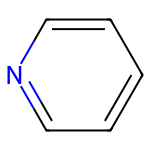

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image, display

# Single molecule: pyridine
mol = Chem.MolFromSmiles("c1ccncc1")
img = Draw.MolToImage(mol, size=(150, 150))
img.save("pyridine.png")  # Save to file
display(Image(filename="pyridine.png"))  # Show inline

# Multiple molecules in a grid
smiles_list = ["CCO", "c1ccccc1", "CCN(CC)CC", "C1=CC=CC=C1C(O)=O"]  # ethanol, benzene, triethylamine, benzoic acid
mols = [Chem.MolFromSmiles(s) for s in smiles_list]

img2 = Draw.MolsToGridImage(
    mols,
    molsPerRow=2,
    subImgSize=(150, 150),
    legends=["Ethanol", "Benzene", "Triethylamine", "Benzoic acid"]
)


While 2D diagrams show connectivity, 3D visualization reveals molecular shape and conformation—important for sterics, binding, and interactions. RDKit can generate 3D coordinates (via embedding and force fields), but it lacks a built-in 3D viewer. Typically, structures can be exported (MOL2, PDB) and viewed in external tools like PyMOL or Chimera.  

Within notebooks, a common solution is **py3Dmol**, which brings the 3Dmol.js WebGL viewer into Python for interactive molecular visualization.  

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

# Example molecule
mol = Chem.MolFromSmiles("CC(O)C(O)C")

# Add explicit hydrogens
mol = Chem.AddHs(mol)

# Generate 3D coordinates
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Convert to MOL block
mb = Chem.MolToMolBlock(mol)

# 3D viewer
view = py3Dmol.view(width=300, height=300)
view.addModel(mb, "mol")
view.setStyle({"stick": {}})
view.zoomTo()
view.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.